# Playground for images.
**Goal**   
-check size  
-find outliners  
-handle outliners  
-make a resize, crop and etc 

## Bib
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba - working with outliners  
https://towardsdatascience.com/pytorch-ignite-classifying-tiny-imagenet-with-efficientnet-e5b1768e5e8f - tutorial how to do preprocess for images  
https://towardsdatascience.com/beginners-guide-to-loading-image-data-with-pytorch-289c60b7afec - also guide how to make dataloader for images with pytorch  
https://pytorch.org/vision/stable/transforms.html - transforms documentation

## Data analysis

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns
from torchvision import transforms as T
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train_image=train.copy()

In [4]:
path_images='train_3/'

In [57]:
train_image["img"] = train["Id"].apply(lambda x:x+ ".jpg")

In [58]:
train_image=train_image[['img', 'Pawpularity']]

In [59]:
train_image#dataset with images+file and pawpularity

,img,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0.jpg,63
1,0009c66b9439883ba2750fb825e1d7db.jpg,42
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,28
3,0018df346ac9c1d8413cfcc888ca8246.jpg,15
4,001dc955e10590d3ca4673f034feeef2.jpg,72
...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57.jpg,15
9908,ffcc8532d76436fc79e50eb2e5238e45.jpg,70
9909,ffdf2e8673a1da6fb80342fa3b119a20.jpg,20
9910,fff19e2ce11718548fa1c5d039a5192a.jpg,20


In [ ]:
train_image.loc[(train_image.Pawpularity<90), 'Pawpularity']=0

In [61]:
train_image.loc[(train_image.Pawpularity>=90), 'Pawpularity']=1

In [60]:
#train_image.loc[(train_image.Pawpularity<90), 'Pawpularity']=0

In [62]:
train_image[train_image.Pawpularity==1]

,img,Pawpularity
15,0067aaaa500b530c76b9c91af34b4cb8.jpg,1
19,00768659c1c90409f81dcdecbd270513.jpg,1
44,0117f444e6118619c4f6492cba703177.jpg,1
50,013f86ed0e765b189990d3d5ac28bd7d.jpg,1
86,0254f54b148543442373d5aad45b2d1a.jpg,1
...,...,...
9797,fce5c86414b1c60b7af20ddbb8510d83.jpg,1
9836,fde75ba22f491d31c9267e59f6cbfe1a.jpg,1
9843,fe200aff478f55ca4bcf77d9dade1217.jpg,1
9873,feb371403a5f656fd8a0ca434d845f2d.jpg,1


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
training, validation = train_test_split(train_image, test_size = 0.25, random_state=17)

In [65]:
training

,img,Pawpularity
9428,f3b6caef27b149b017b4296fc4d92233.jpg,0
6037,9c449a44e39d5401a2706f66a5692b95.jpg,0
3984,65caeeff5316697f80e4a53056c9796e.jpg,0
1106,1c5feedf1728d122361a5dcaa6780df2.jpg,0
4471,721096811f3e8b6667ff7153252866d5.jpg,0
...,...,...
8470,db58a8c3b559121d49ea95284fe33997.jpg,0
6061,9cc32a9a572e139c70aa19d19a8f9f52.jpg,0
9529,f5ffd9275722c19544b72a2d53c091c5.jpg,0
406,0abaeee2454accbd466333768bc0fb08.jpg,0


In [66]:
validation

,img,Pawpularity
8667,e089a1142afac8a78448e4e8b28ba6c6.jpg,0
7144,b7ea2b79695d0b8fb70f734eae86b0da.jpg,0
1090,1bd824b7743dd0e4d41d07f34bf0137b.jpg,0
1375,234dcba7ff1d9c8be4fff928f85f332e.jpg,0
4990,809faf56ea106090875893cbd1e5e2b6.jpg,1
...,...,...
248,06c6888fb45d558cae1330f3e106c745.jpg,0
4527,7383963f13a454c843afc888bb2ad7b3.jpg,0
1481,263c7fb078644c41b9b73203708e6594.jpg,0
1102,1c4b612f72a96f86fb0ec97322412822.jpg,0


In [67]:
training_25, validation_25 =  train_test_split(validation, test_size = 0.25, random_state=17)

In [68]:
training_25

,img,Pawpularity
7659,c5e2213bdf407f7e330415c90ecd2570.jpg,0
4457,71daa33b3a3c310bbdcd2d98d1243d90.jpg,0
9723,fb0d6c91436c549a93e43f035127ff60.jpg,0
4005,6640bfef57ed16a52e78c598c38a7d8a.jpg,0
9020,e90843809be922a619051b92e51f3c0b.jpg,0
...,...,...
2697,4584a6f50a941b04c3f033775ab07d27.jpg,0
8677,e0aaca58a61a6062abb96e38c07fa4ce.jpg,0
9172,ecebf6a4483edc92e210da9e3e20f1ec.jpg,0
5036,81ea0b23304059bdefcd6ef2c6648f47.jpg,0


In [69]:
validation_25

,img,Pawpularity
8026,cffdcbe7f44f19ffaafe26accb8e8bd4.jpg,0
8936,e6ffbba1d6700f747ceaa2e291894e6a.jpg,0
7337,bce09001893018dd48c19a0fd6a5b065.jpg,0
7979,cea60d573785eed732b00bfd518ee5cf.jpg,1
1558,27c579c7e4744af55505f910c56ee94b.jpg,0
...,...,...
9243,ef44e40acc41c1e5db35086a9fe9d7e8.jpg,0
6101,9dd45b01329c1f9caf419cd969c30c6e.jpg,0
3271,54977bf2ca43e79c371f1cef1cf3fc01.jpg,0
2417,3e1ce0b7a7aff8849d248e8ce5ca8707.jpg,0


### For now decided to skip this part

In [9]:
#target of loop below to give us information about pictures size
h=[]
w=[]
for img in train_image.img:
    pic=Image.open('train/'+img)
    h.append(pic.size[0])
    w.append(pic.size[1])
train_image['h']=h
train_image['w']=w

FileNotFoundError: [Errno 2] No such file or directory: 'train/0007de18844b0dbbb5e1f607da0606e0.jpg'

In [9]:
train_image

,img,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0.jpg,63
1,0009c66b9439883ba2750fb825e1d7db.jpg,42
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,28
3,0018df346ac9c1d8413cfcc888ca8246.jpg,15
4,001dc955e10590d3ca4673f034feeef2.jpg,72
...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57.jpg,15
9908,ffcc8532d76436fc79e50eb2e5238e45.jpg,70
9909,ffdf2e8673a1da6fb80342fa3b119a20.jpg,20
9910,fff19e2ce11718548fa1c5d039a5192a.jpg,20


### Discover outliners with visualization

**build distribution**

<AxesSubplot:xlabel='h', ylabel='Count'>

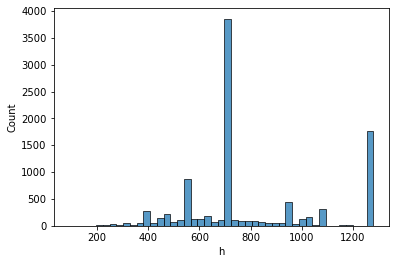

In [222]:
sns.histplot(x='h', data=train_image )

<AxesSubplot:xlabel='w', ylabel='Count'>

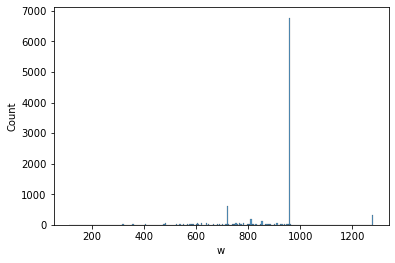

In [223]:
sns.histplot(x='w', data=train_image )

**build box plots**  
*outliners may be plotted as individual points*

<AxesSubplot:xlabel='h'>

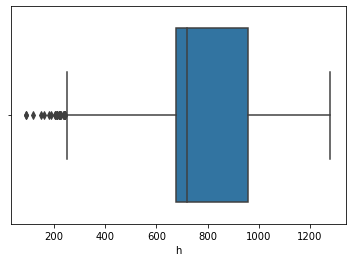

In [224]:
sns.boxplot(x=train_image['h'])
#hight before 200 can be outliners

<AxesSubplot:xlabel='w'>

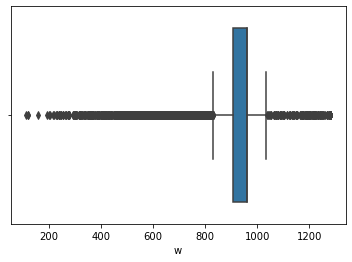

In [225]:
sns.boxplot(x=train_image['w'])
#width before 800 and after 1000

### Discover outliners with mathematical function

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [11]:
from scipy import stats
import numpy as np
z_h = np.abs(stats.zscore(train_image['h']))
print(z_h)

KeyError: 'h'

In [227]:
z_w = np.abs(stats.zscore(train_image['w']))
print(z_w)

[1.17454796 0.83037545 0.35510762 ... 0.05280054 0.35510762 0.35510762]


In [228]:
threshold = 3
print(np.where(z_h < 3))

(array([   0,    1,    2, ..., 9909, 9910, 9911], dtype=int64),)


In [229]:
print(np.where(z_w > 3))

(array([  67,   73,   75,   89,  202,  210,  248,  303,  355,  517,  552,
        592,  837,  844,  892,  997, 1002, 1030, 1103, 1250, 1276, 1327,
       1370, 1416, 1470, 1491, 1508, 1675, 1754, 1797, 1970, 2043, 2091,
       2170, 2253, 2254, 2259, 2304, 2357, 2445, 2476, 2529, 2566, 2607,
       2615, 2728, 2762, 2784, 2831, 2879, 2929, 2952, 2959, 3004, 3081,
       3123, 3137, 3144, 3150, 3162, 3176, 3189, 3255, 3304, 3390, 3408,
       3409, 3420, 3468, 3660, 3739, 3796, 3858, 3946, 3990, 4130, 4349,
       4476, 4650, 4741, 4779, 4836, 4988, 5027, 5077, 5153, 5281, 5440,
       5456, 5533, 5687, 5732, 5823, 5830, 5869, 5895, 5954, 6004, 6013,
       6043, 6159, 6163, 6168, 6171, 6185, 6324, 6350, 6389, 6485, 6492,
       6511, 6622, 6629, 6640, 6680, 6690, 6705, 6716, 6781, 6786, 6809,
       6867, 7118, 7201, 7243, 7247, 7378, 7466, 7684, 7746, 7843, 7902,
       7909, 7982, 8008, 8130, 8140, 8180, 8408, 8575, 8589, 8641, 8645,
       8646, 8767, 8780, 8809, 8823, 8876, 8881, 8

In [230]:
outliners=np.where(z_w > 3)

In [231]:
z_w[67]

4.380451093137453

In [232]:
outliners[0]

array([  67,   73,   75,   89,  202,  210,  248,  303,  355,  517,  552,
        592,  837,  844,  892,  997, 1002, 1030, 1103, 1250, 1276, 1327,
       1370, 1416, 1470, 1491, 1508, 1675, 1754, 1797, 1970, 2043, 2091,
       2170, 2253, 2254, 2259, 2304, 2357, 2445, 2476, 2529, 2566, 2607,
       2615, 2728, 2762, 2784, 2831, 2879, 2929, 2952, 2959, 3004, 3081,
       3123, 3137, 3144, 3150, 3162, 3176, 3189, 3255, 3304, 3390, 3408,
       3409, 3420, 3468, 3660, 3739, 3796, 3858, 3946, 3990, 4130, 4349,
       4476, 4650, 4741, 4779, 4836, 4988, 5027, 5077, 5153, 5281, 5440,
       5456, 5533, 5687, 5732, 5823, 5830, 5869, 5895, 5954, 6004, 6013,
       6043, 6159, 6163, 6168, 6171, 6185, 6324, 6350, 6389, 6485, 6492,
       6511, 6622, 6629, 6640, 6680, 6690, 6705, 6716, 6781, 6786, 6809,
       6867, 7118, 7201, 7243, 7247, 7378, 7466, 7684, 7746, 7843, 7902,
       7909, 7982, 8008, 8130, 8140, 8180, 8408, 8575, 8589, 8641, 8645,
       8646, 8767, 8780, 8809, 8823, 8876, 8881, 88

In [233]:
train_image

,img,Pawpularity,h,w
0,0007de18844b0dbbb5e1f607da0606e0.jpg,63,405,720
1,0009c66b9439883ba2750fb825e1d7db.jpg,42,1032,774
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,28,720,960
3,0018df346ac9c1d8413cfcc888ca8246.jpg,15,405,720
4,001dc955e10590d3ca4673f034feeef2.jpg,72,540,960
...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57.jpg,15,786,960
9908,ffcc8532d76436fc79e50eb2e5238e45.jpg,70,720,960
9909,ffdf2e8673a1da6fb80342fa3b119a20.jpg,20,696,896
9910,fff19e2ce11718548fa1c5d039a5192a.jpg,20,720,960


### Removing outliners

In [12]:
train_image_new=train_image.drop([ 67,   73,   75,   89,  202,  210,  248,  303,  355,  517,  552,
        592,  837,  844,  892,  997, 1002, 1030, 1103, 1250, 1276, 1327,
       1370, 1416, 1470, 1491, 1508, 1675, 1754, 1797, 1970, 2043, 2091,
       2170, 2253, 2254, 2259, 2304, 2357, 2445, 2476, 2529, 2566, 2607,
       2615, 2728, 2762, 2784, 2831, 2879, 2929, 2952, 2959, 3004, 3081,
       3123, 3137, 3144, 3150, 3162, 3176, 3189, 3255, 3304, 3390, 3408,
       3409, 3420, 3468, 3660, 3739, 3796, 3858, 3946, 3990, 4130, 4349,
       4476, 4650, 4741, 4779, 4836, 4988, 5027, 5077, 5153, 5281, 5440,
       5456, 5533, 5687, 5732, 5823, 5830, 5869, 5895, 5954, 6004, 6013,
       6043, 6159, 6163, 6168, 6171, 6185, 6324, 6350, 6389, 6485, 6492,
       6511, 6622, 6629, 6640, 6680, 6690, 6705, 6716, 6781, 6786, 6809,
       6867, 7118, 7201, 7243, 7247, 7378, 7466, 7684, 7746, 7843, 7902,
       7909, 7982, 8008, 8130, 8140, 8180, 8408, 8575, 8589, 8641, 8645,
       8646, 8767, 8780, 8809, 8823, 8876, 8881, 8884, 8905, 8980, 9068,
       9269, 9344, 9392, 9447, 9515, 9538, 9562, 9565, 9590, 9680, 9751,
       9805, 9868, 9887], axis='index')

In [13]:
train_image_new#перенумеровать индексы, тогда дальше ошибок не будет

,img,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0.jpg,63
1,0009c66b9439883ba2750fb825e1d7db.jpg,42
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,28
3,0018df346ac9c1d8413cfcc888ca8246.jpg,15
4,001dc955e10590d3ca4673f034feeef2.jpg,72
...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57.jpg,15
9908,ffcc8532d76436fc79e50eb2e5238e45.jpg,70
9909,ffdf2e8673a1da6fb80342fa3b119a20.jpg,20
9910,fff19e2ce11718548fa1c5d039a5192a.jpg,20


In [14]:
train_image_new.index=np.arange(0,9744) #что-то такое

## Data preprocessing

In [129]:
import torchvision.datasets as datasets
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.io import read_image

In [108]:
show_batch(train_dl)

tensor([[[214, 145,  94,  ..., 237, 236, 236],
         [227, 154,  94,  ..., 237, 236, 236],
         [242, 164,  92,  ..., 237, 236, 236],
         ...,
         [ 21,  21,  21,  ...,  41,  41,  42],
         [ 21,  21,  21,  ...,  40,  41,  42],
         [ 21,  21,  21,  ...,  40,  42,  42]],

        [[180, 114,  63,  ..., 207, 206, 206],
         [195, 122,  63,  ..., 207, 206, 206],
         [210, 132,  62,  ..., 207, 206, 206],
         ...,
         [ 20,  20,  20,  ...,  32,  32,  33],
         [ 20,  20,  20,  ...,  31,  32,  33],
         [ 20,  20,  20,  ...,  31,  33,  33]],

        [[153,  86,  35,  ..., 209, 206, 206],
         [170,  97,  35,  ..., 209, 206, 206],
         [187, 107,  36,  ..., 209, 206, 206],
         ...,
         [ 16,  16,  16,  ...,  23,  23,  24],
         [ 16,  16,  16,  ...,  22,  23,  24],
         [ 16,  16,  16,  ...,  22,  24,  24]]], dtype=torch.uint8)
tensor([[[150, 150, 150,  ..., 150, 150, 150],
         [150, 150, 150,  ..., 150, 150,

tensor([[[  4,   5,   5,  ..., 186, 186, 186],
         [  6,   6,   6,  ..., 184, 184, 184],
         [  7,   7,   7,  ..., 183, 183, 183],
         ...,
         [162, 161, 161,  ..., 148, 146, 145],
         [161, 161, 160,  ..., 151, 151, 150],
         [160, 160, 159,  ..., 149, 151, 151]],

        [[  0,   1,   1,  ...,  99,  99,  99],
         [  2,   2,   2,  ...,  97,  97,  97],
         [  3,   3,   3,  ...,  96,  96,  96],
         ...,
         [108, 107, 107,  ...,  99,  97,  96],
         [107, 107, 106,  ..., 102, 102, 101],
         [106, 106, 105,  ...,  98, 100, 101]],

        [[  0,   0,   0,  ...,  92,  92,  92],
         [  1,   1,   1,  ...,  90,  90,  90],
         [  2,   2,   2,  ...,  89,  89,  89],
         ...,
         [ 38,  35,  33,  ...,  40,  38,  37],
         [ 37,  35,  32,  ...,  36,  36,  35],
         [ 36,  34,  33,  ...,  32,  34,  32]]], dtype=torch.uint8)
tensor([[[ 12,  12,  12,  ...,  20,  20,  20],
         [ 12,  12,  12,  ...,  20,  20,

tensor([[[242, 242, 240,  ..., 255, 255, 255],
         [242, 242, 240,  ..., 255, 255, 255],
         [242, 242, 240,  ..., 255, 255, 255],
         ...,
         [254, 254, 254,  ..., 255, 255, 255],
         [254, 254, 254,  ..., 255, 255, 255],
         [254, 254, 254,  ..., 255, 255, 255]],

        [[239, 239, 239,  ..., 255, 255, 255],
         [239, 239, 239,  ..., 255, 255, 255],
         [239, 239, 239,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[234, 234, 235,  ..., 255, 255, 255],
         [234, 234, 235,  ..., 255, 255, 255],
         [234, 234, 235,  ..., 255, 255, 255],
         ...,
         [253, 253, 253,  ..., 255, 255, 255],
         [253, 253, 253,  ..., 255, 255, 255],
         [253, 253, 253,  ..., 255, 255, 255]]], dtype=torch.uint8)
tensor([[[126, 124, 121,  ..., 200, 200, 200],
         [125, 123, 121,  ..., 200, 200,

tensor([[[180, 167, 170,  ..., 217, 233, 231],
         [173, 166, 178,  ..., 222, 234, 225],
         [202, 183, 176,  ..., 235, 241, 226],
         ...,
         [ 47,  52,  56,  ...,  37,  35,  37],
         [ 48,  51,  53,  ...,  40,  38,  39],
         [ 51,  49,  48,  ...,  43,  42,  43]],

        [[180, 167, 170,  ..., 224, 240, 238],
         [171, 164, 177,  ..., 229, 241, 232],
         [200, 181, 174,  ..., 239, 245, 230],
         ...,
         [ 31,  36,  40,  ...,  18,  16,  18],
         [ 32,  35,  37,  ...,  21,  19,  20],
         [ 35,  33,  32,  ...,  24,  23,  24]],

        [[156, 143, 146,  ..., 230, 246, 244],
         [148, 141, 156,  ..., 235, 249, 240],
         [179, 160, 153,  ..., 248, 254, 239],
         ...,
         [ 18,  23,  27,  ...,   3,   1,   3],
         [ 19,  22,  24,  ...,   6,   4,   5],
         [ 22,  20,  19,  ...,   9,   8,   9]]], dtype=torch.uint8)
tensor([[[ 73,  85,  91,  ...,  22,  21,  20],
         [ 55,  84,  93,  ...,  25,  24,

tensor([[[ 96, 103, 106,  ..., 226, 226, 226],
         [ 97, 102, 102,  ..., 225, 226, 225],
         [ 99, 100,  98,  ..., 224, 224, 225],
         ...,
         [205, 204, 204,  ..., 201, 201, 201],
         [203, 203, 203,  ..., 201, 200, 201],
         [202, 203, 205,  ..., 199, 197, 198]],

        [[ 82,  89,  92,  ..., 210, 210, 210],
         [ 83,  88,  88,  ..., 209, 210, 209],
         [ 85,  86,  84,  ..., 208, 208, 209],
         ...,
         [186, 185, 185,  ..., 186, 186, 186],
         [184, 184, 184,  ..., 186, 185, 186],
         [183, 184, 187,  ..., 186, 187, 188]],

        [[ 56,  63,  66,  ..., 184, 184, 184],
         [ 57,  62,  62,  ..., 183, 184, 183],
         [ 59,  60,  58,  ..., 182, 182, 183],
         ...,
         [144, 143, 143,  ..., 147, 147, 147],
         [142, 142, 142,  ..., 147, 146, 147],
         [140, 141, 141,  ..., 151, 151, 152]]], dtype=torch.uint8)
tensor([[[146, 147, 148,  ..., 124, 119, 116],
         [146, 147, 148,  ..., 124, 119,

tensor([[[198, 199, 200,  ..., 186, 186, 183],
         [206, 206, 206,  ..., 175, 175, 174],
         [200, 200, 202,  ..., 176, 178, 180],
         ...,
         [117, 144, 151,  ..., 254, 251, 228],
         [151, 129, 115,  ..., 247, 253, 250],
         [179, 145, 127,  ..., 250, 250, 246]],

        [[ 90,  91,  90,  ...,  80,  80,  81],
         [ 99,  99,  98,  ...,  70,  71,  72],
         [ 95,  95,  95,  ...,  74,  74,  80],
         ...,
         [126, 150, 157,  ..., 253, 243, 232],
         [153, 131, 115,  ..., 246, 247, 255],
         [180, 144, 123,  ..., 250, 244, 252]],

        [[ 52,  53,  53,  ...,  58,  56,  58],
         [ 63,  63,  62,  ...,  48,  46,  49],
         [ 63,  63,  63,  ...,  51,  49,  57],
         ...,
         [121, 146, 155,  ..., 255, 254, 231],
         [148, 128, 113,  ..., 252, 255, 255],
         [175, 140, 122,  ..., 255, 255, 252]]], dtype=torch.uint8)
tensor([[[217, 218, 218,  ..., 203, 203, 204],
         [217, 218, 218,  ..., 202, 202,

RuntimeError: stack expects each tensor to be equal size, but got [3, 341, 256] at entry 0 and [3, 363, 256] at entry 1

### preprocess for one image

In [127]:
   preprocess = T.Compose([
        #T.ToPILImage(),
        T.Resize(256), # Resize images to 256 x 256
        T.CenterCrop(224), # Center crop image
                #T.RandomHorizontalFlip(),
        #T.ToTensor(), # Converting cropped images to tensors
        #T.Normalize(mean=[0.5, 0.5, 0.5], 
                    #std=[0.5, 0.5, 0.5])
    ])

In [128]:
for img in train_image.file_path:
    pic=Image.open(img)
    pic.show()
    pic=preprocess(pic)
    pic.show()
    break

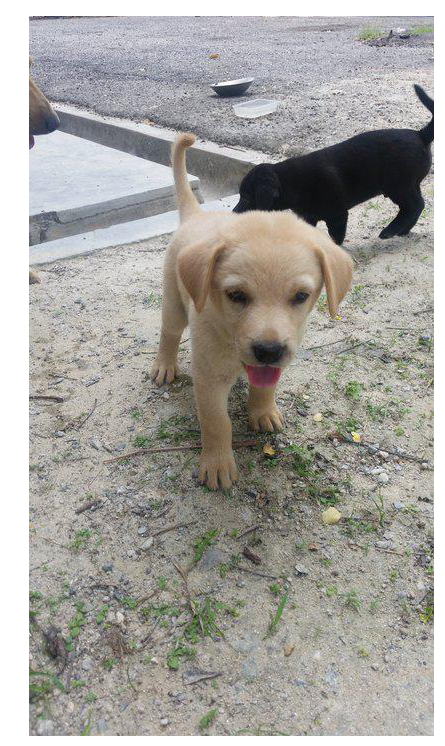

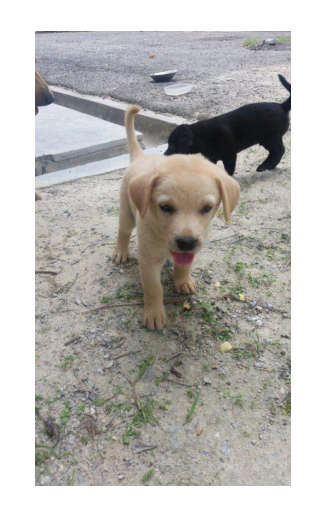

## Creating folders for training in view cat/class/img_name.img

In [72]:
from torch.utils.data import DataLoader, TensorDataset, Dataset
import torchvision.datasets as datasets
from torchvision.utils import make_grid

**First step:**
Make folders with images belong to different classes: 1-100

**Training set**

In [74]:
for i in range(len(training_25)):
    label=str(training_25.iloc[i].Pawpularity)
    img=str(training_25.iloc[i].img)
    newpath=(os.path.join('train_4/', label))
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    if os.path.exists(os.path.join('train_4/', img)):
        os.rename(os.path.join('train_4/', img), os.path.join(newpath,img))

In [22]:
for i in range(len(training_25)):
    label=str(training_25.iloc[i].Pawpularity)
    img=str(training_25.iloc[i].img)
    newpath=(os.path.join('train_1/', label))
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    if os.path.exists(os.path.join('train_1/', img)):
        os.rename(os.path.join('train_1/', img), os.path.join(newpath,img))

***Validation set***

In [75]:
for i in range(len(validation_25)):
    label=str(validation_25.iloc[i].Pawpularity)
    img=str(validation_25.iloc[i].img)
    newpath=(os.path.join('train_4/', label))
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    if os.path.exists(os.path.join('train_4/', img)):
        os.rename(os.path.join('train_4/', img), os.path.join(newpath,img))

## Augmentation and loaders

**Second step**:
define preprocessing parameters

In [42]:
preprocess_classification = T.Compose([
                T.Resize(256), # Resize images to 256 x 256
                T.CenterCrop(224), # Center crop image
                T.RandomHorizontalFlip(),
                T.ToTensor(),  # Converting cropped images to tensors
                T.Normalize(mean=[0.5, 0.5, 0.5], 
                            std=[0.5, 0.5, 0.5])
])

**Third step**: create dataloaders

In [43]:
# Setup function to create dataloaders for image datasets
def generate_dataloader(data, name, transform):
    if data is None: 
        return None
    
    # Read image files to pytorch dataset using ImageFolder, a generic data 
    # loader where images are in format root/label/filename
    # See https://pytorch.org/vision/stable/datasets.html
    if transform is None:
        dataset = datasets.ImageFolder(data, transform=T.ToTensor())
    else:
        dataset = datasets.ImageFolder(data, transform=transform)

    # Set options for device
    #if use_cuda:
    #    kwargs = {"pin_memory": True, "num_workers": 1}
    #else:
    #    kwargs = {}
    
    # Wrap image dataset (defined above) in dataloader 
    dataloader = DataLoader(dataset, batch_size=batch_size, 
                        shuffle=(name=="train"))
    
    return dataloader

In [44]:
# Functions to display single or a batch of sample images
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
def show_batch(dataloader):
    dataiter = iter(dataloader)
    images, labels = dataiter.next()    
    imshow(make_grid(images)) # Using Torchvision.utils make_grid function
    
def show_image(dataloader):
    dataiter = iter(dataloader)
    images, labels = dataiter.next()
    random_num = randint(0, len(images)-1)
    imshow(images[random_num])
    label = labels[random_num]
    print(f'Label: {label}, Shape: {images[random_num].shape}')

In [47]:
batch_size = 64

# Create DataLoaders for pre-trained models (normalized based on specific requirements)
train_loader = generate_dataloader(path_images, "train",
                                  transform=preprocess_classification)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


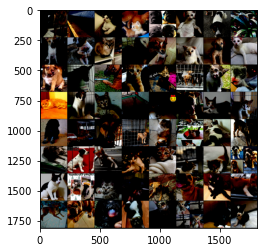

In [48]:
show_batch(train_loader)

In [51]:
val_loader = generate_dataloader(path_images, "val",
                                 transform=preprocess_classification)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


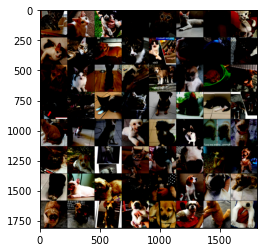

In [52]:
# Display batch of validation images
show_batch(val_loader)